# Accidents in France from 2005 to 2016
Help prevent accidents.

Every year, Car accidents occur as a result of a collision between a vehicle and another vehicle, or a collision between a vehicle and the surrounding road elements, such as animals, pedestrians, and stationary objects. Sometimes they are dangerous, resulting in some deaths, and there are many causes and factors that may contribute to car accidents, which sometimes lead to legal issues.
So, what are the most common causes of these accidents?

This dataset about Accidents in France from 2005 to 2016 on Kaggle.

In [242]:
#import 
import sys 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [243]:
#reading datasets
CA = pd.read_csv('caracteristics.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


CARACTERISTICS :

Num_Acc : Accident ID

jour : Day of the accident

mois : Month of the accident

an : Year of the accident

hrmn : Time of the accident in hour and minutes (hhmm)

lum : Lighting : lighting conditions in which the accident occurred
1 - Full day

2 - Twilight or dawn

3 - Night without public lighting

4 - Night with public lighting not lit

5 - Night with public lighting on

dep : Departmeent : INSEE Code (National Institute of Statistics and Economic Studies) of the departmeent followed
by a 0 (201 Corse-du-Sud - 202 Haute-Corse)

com : Municipality: The commune number is a code given by INSEE. The code has 3 numbers set to the right.

Localisation :
1 - Out of agglomeration

2 - In built-up areas

int : Type of Intersection :

1 - Out of intersection

2 - Intersection in X

3 - Intersection in T

4 - Intersection in Y

5 - Intersection with more than 4 branches

6 - Giratory

7 - Place

8 - Level crossing

9 - Other intersection

atm : Atmospheric conditions:
1 - Normal

2 - Light rain

3 - Heavy rain

4 - Snow - hail

5 - Fog - smoke

6 - Strong wind - storm

7 - Dazzling weather

8 - Cloudy weather

9 - Other

col : Type of collision:
1 - Two vehicles - frontal

2 - Two vehicles - from the rear

3 - Two vehicles - by the side

4 - Three vehicles and more - in chain

5 - Three or more vehicles - multiple collisions

6 - Other collision

7 - Without collision

adr : Postal address: variable filled in for accidents occurring in built-up areas

gps : GPS coding: 1 originator character:
M = Métropole

A = Antilles (Martinique or Guadeloupe)

G = Guyane

R = Réunion

Y = Mayotte

Geographic coordinates in decimal degrees:
lat : Latitude

long : Longitude

In [244]:
CA.index

RangeIndex(start=0, stop=839985, step=1)

In [245]:
#Let's take alook on the data
CA

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0.0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimeti�re,M,0.0,0.0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0.0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0.0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0.0,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,5,12,21,2035,5,2,2,1.0,3.0,416.0,"sans, LEBLOND(RUE M. ET",NaN,NaN,NaN,974
839981,200500087951,5,12,23,1010,1,2,1,1.0,3.0,416.0,"SANS, PRESIDENT MITTERAN",NaN,NaN,NaN,974
839982,200500087952,5,12,26,1715,1,2,2,1.0,3.0,416.0,"SANS, LEBLOND(RUE M. ET",NaN,NaN,NaN,974
839983,200500087953,5,12,27,1500,1,2,3,2.0,5.0,416.0,"SANS, HUBERT DE LISLE(BO",NaN,NaN,NaN,974


In [246]:
CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   an       839985 non-null  int64  
 2   mois     839985 non-null  int64  
 3   jour     839985 non-null  int64  
 4   hrmn     839985 non-null  int64  
 5   lum      839985 non-null  int64  
 6   agg      839985 non-null  int64  
 7   int      839985 non-null  int64  
 8   atm      839930 non-null  float64
 9   col      839974 non-null  float64
 10  com      839983 non-null  float64
 11  adr      699443 non-null  object 
 12  gps      366226 non-null  object 
 13  lat      362471 non-null  float64
 14  long     362467 non-null  object 
 15  dep      839985 non-null  int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 102.5+ MB


In [247]:
CA.describe()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,lat,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839930.000000,839974.000000,839983.000000,3.624710e+05,839985.000000
mean,2.010011e+11,10.011129,6.679437,15.594687,1381.093505,1.912588,1.685924,1.694066,1.547116,4.187484,186.510172,2.849715e+06,564.257671
std,3.458009e+08,3.458059,3.389489,8.750201,540.757462,1.517900,0.464147,1.510792,1.587668,1.974998,171.873105,2.284591e+06,291.153083
min,2.005000e+11,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,10.000000
25%,2.007000e+11,7.000000,4.000000,8.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,3.000000,55.000000,0.000000e+00,310.000000
50%,2.010000e+11,10.000000,7.000000,15.000000,1446.000000,1.000000,2.000000,1.000000,1.000000,3.000000,118.000000,4.370200e+06,630.000000
75%,2.013000e+11,13.000000,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,6.000000,278.000000,4.799218e+06,780.000000
max,2.016001e+11,16.000000,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,7.000000,987.000000,5.564823e+06,976.000000


As you can see there is two bizarres values in minimum `int` because it is abbreviation of Type of Intersection which is 1 to 9. Also, in `com` minimum which is the commune number is a code given by INSEE. The code has 3 numbers set to the right. So, the bizarre is 0.

In [255]:
# Determine the na value 
# Stat index from year because I am not interest in Acc_ID

CA = pd.read_csv('caracteristics.csv', 
                 na_values = 0,
                 
)

In [256]:
CA.index

RangeIndex(start=0, stop=839985, step=1)

In [257]:
# Drop columns not intereted in
CA = CA.drop(['Num_Acc','lat','long'], axis = 1)

In [258]:
CA.head()

,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,dep
0,16,2,1,1445,1,2,1.0,8.0,3.0,5.0,"46, rue Sonneville",M,590
1,16,3,16,1800,1,2,6.0,1.0,6.0,5.0,1a rue du cimeti�re,M,590
2,16,7,13,1900,1,1,1.0,1.0,6.0,11.0,NaN,M,590
3,16,8,15,1930,2,2,1.0,7.0,3.0,477.0,52 rue victor hugo,M,590
4,16,12,23,1100,1,2,3.0,1.0,3.0,11.0,rue Joliot curie,M,590


In [259]:
CA.head()

,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,dep
0,16,2,1,1445,1,2,1.0,8.0,3.0,5.0,"46, rue Sonneville",M,590
1,16,3,16,1800,1,2,6.0,1.0,6.0,5.0,1a rue du cimeti�re,M,590
2,16,7,13,1900,1,1,1.0,1.0,6.0,11.0,NaN,M,590
3,16,8,15,1930,2,2,1.0,7.0,3.0,477.0,52 rue victor hugo,M,590
4,16,12,23,1100,1,2,3.0,1.0,3.0,11.0,rue Joliot curie,M,590


In [260]:
CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   an      839985 non-null  int64  
 1   mois    839985 non-null  int64  
 2   jour    839985 non-null  int64  
 3   hrmn    839985 non-null  int64  
 4   lum     839985 non-null  int64  
 5   agg     839985 non-null  int64  
 6   int     839879 non-null  float64
 7   atm     839930 non-null  float64
 8   col     839974 non-null  float64
 9   com     839982 non-null  float64
 10  adr     699434 non-null  object 
 11  gps     366217 non-null  object 
 12  dep     839985 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 83.3+ MB


In [261]:
CA.describe()

,an,mois,jour,hrmn,lum,agg,int,atm,col,com,dep
count,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839879.000000,839930.000000,839974.000000,839982.000000,839985.000000
mean,10.011129,6.679437,15.594687,1381.093505,1.912588,1.685924,1.694280,1.547116,4.187484,186.510394,564.257671
std,3.458059,3.389489,8.750201,540.757462,1.517900,0.464147,1.510767,1.587668,1.974998,171.873087,291.153083
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000
25%,7.000000,4.000000,8.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,3.000000,55.000000,310.000000
50%,10.000000,7.000000,15.000000,1446.000000,1.000000,2.000000,1.000000,1.000000,3.000000,118.000000,630.000000
75%,13.000000,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,6.000000,278.000000,780.000000
max,16.000000,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,7.000000,987.000000,976.000000


 # Now, Let's handl with  missings values 

In [262]:
CA.isna().sum()

an           0
mois         0
jour         0
hrmn         0
lum          0
agg          0
int        106
atm         55
col         11
com          3
adr     140551
gps     473768
dep          0
dtype: int64

In [263]:
CA.shape

(839985, 13)

In [264]:
# Drop na that is less than 5%
CA.dropna(subset=['int','atm','col','com'], inplace=True)

In [265]:
CA.shape

(839813, 13)

In [266]:
# check the rest
CA.isna().sum()

an           0
mois         0
jour         0
hrmn         0
lum          0
agg          0
int          0
atm          0
col          0
com          0
adr     140539
gps     473628
dep          0
dtype: int64

In [267]:
#fill na objet data type in method ffill that is to fill in with the last value 
CA["adr"].fillna( method ='ffill', inplace = True)
CA["gps"].fillna( method ='ffill', inplace = True)


In [268]:
CA.isna().sum()

an      0
mois    0
jour    0
hrmn    0
lum     0
agg     0
int     0
atm     0
col     0
com     0
adr     0
gps     0
dep     0
dtype: int64

In [269]:
# Change the numeric value to integer data type
CA['int']=CA.int.astype(int)
CA['atm']=CA.atm.astype(int)
CA['col']=CA.col.astype(int)
CA['com']=CA.com.astype(int)

In [270]:
CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839813 entries, 0 to 839984
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   an      839813 non-null  int64 
 1   mois    839813 non-null  int64 
 2   jour    839813 non-null  int64 
 3   hrmn    839813 non-null  int64 
 4   lum     839813 non-null  int64 
 5   agg     839813 non-null  int64 
 6   int     839813 non-null  int64 
 7   atm     839813 non-null  int64 
 8   col     839813 non-null  int64 
 9   com     839813 non-null  int64 
 10  adr     839813 non-null  object
 11  gps     839813 non-null  object
 12  dep     839813 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 89.7+ MB


After clean the data, let's move to plot.

# visualisation

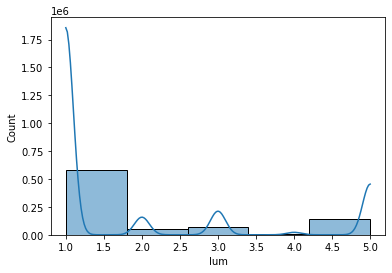

In [271]:
#What is the frequent cause of lighting in accidents?
sns.histplot(CA['lum'],bins=5, kde=True);

The highst frequent is on Full day and the lowest is Night with public lighting not lit.

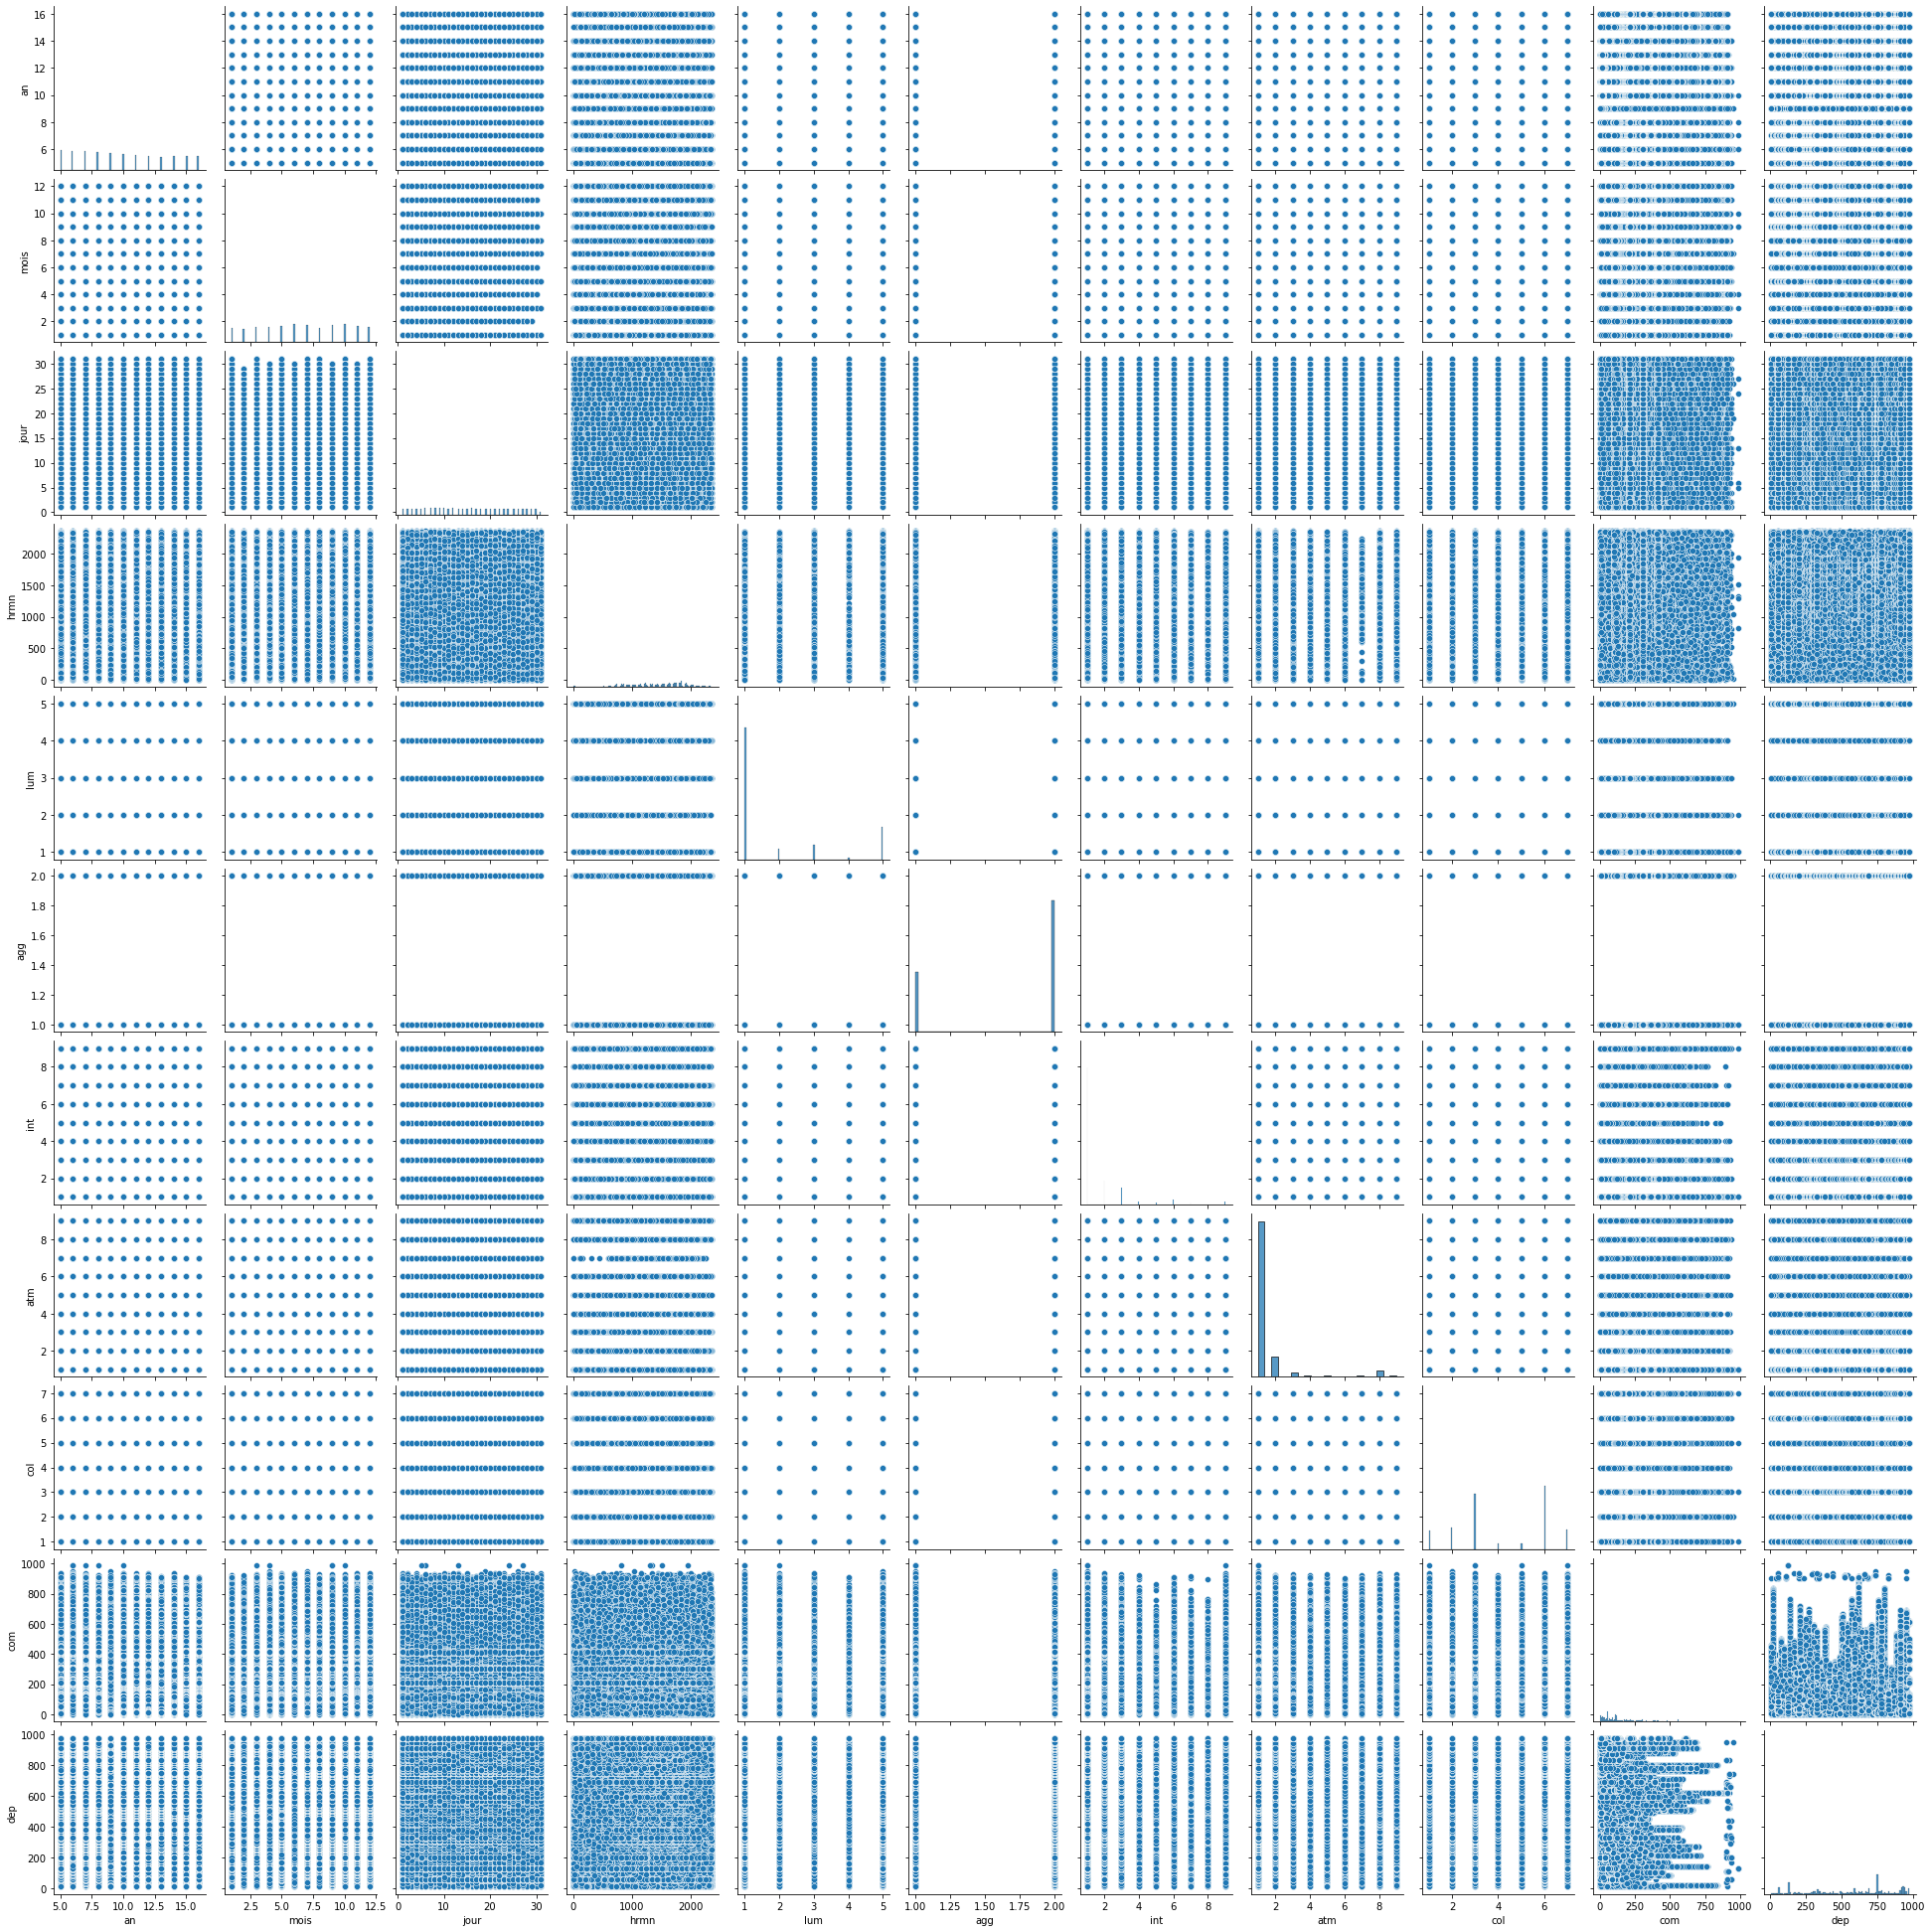

In [273]:
sns.pairplot(CA);

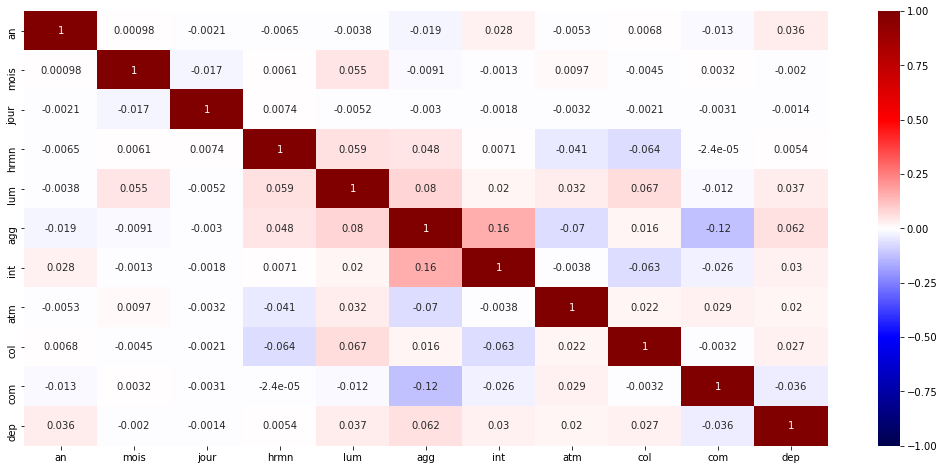

In [274]:
fig = plt.figure(figsize = (18, 8))

sns.heatmap(CA.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

# Modelling

In [275]:
from sklearn.model_selection import train_test_split

In [278]:
#Split the data into training set and testing set using train_test_split
X = CA[['lum', 'agg', 'int','atm']]
y = CA['an']

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [280]:
X_train.shape, X_test.shape

((562674, 4), (277139, 4))

In [281]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [282]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

Train and fit a logistic regression model on the training set.

In [283]:
from sklearn.linear_model import LogisticRegression

In [284]:
logmodel = LogisticRegression()
logmodel.fit(X_train_sc,y_train)

LogisticRegression()

# Now Predictions and Evaluations# 

In [285]:
predictions = logmodel.predict(X_test_sc)

In [286]:
#Get the accuracy of both the train & test set
logmodel.score(X_train_sc, y_train)

0.10282863611967143

In [295]:
#Accuracy is 0.103 that is mean the modele is week 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.10316483786114548

In [296]:
CA['an'].value_counts()

5     87014
7     83843
6     82993
8     76766
9     74402
10    69374
11    66956
12    62247
14    59751
16    59430
15    58653
13    58384
Name: an, dtype: int64

2005 it was one of the highest accident years

Create a classification report for the model.

In [297]:
from sklearn.metrics import classification_report, confusion_matrix

In [298]:
print(classification_report(y_test,predictions))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           5       0.10      0.89      0.19     28728
           6       0.11      0.08      0.09     27293
           7       0.10      0.01      0.02     27781
           8       0.00      0.00      0.00     25353
           9       0.00      0.00      0.00     24484
          10       0.00      0.00      0.00     23062
          11       0.07      0.01      0.01     22001
          12       0.00      0.00      0.00     20612
          13       0.00      0.00      0.00     19381
          14       0.00      0.00      0.00     19647
          15       0.00      0.00      0.00     19272
          16       0.08      0.01      0.02     19525

    accuracy                           0.10    277139
   macro avg       0.04      0.08      0.03    277139
weighted avg       0.04      0.10      0.03    277139



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [299]:
print(confusion_matrix(y_test, predictions))

[[25666  2075   370     0     0     0   312     0     0     0     0   305]
 [24154  2203   352     0     0     0   290     0     0     0     0   294]
 [24753  2110   341     0     0     0   268     0     0     0     0   309]
 [22598  1900   321     0     0     0   241     0     0     0     0   293]
 [22038  1727   281     0     0     0   221     0     0     0     0   217]
 [20702  1684   266     0     0     0   167     0     0     0     0   243]
 [19696  1629   298     0     0     0   162     0     0     0     0   216]
 [18555  1485   264     0     0     0   148     0     0     0     0   160]
 [17531  1320   260     0     0     0   118     0     0     0     0   152]
 [17672  1383   271     0     0     0   123     0     0     0     0   198]
 [17170  1451   270     0     0     0   157     0     0     0     0   224]
 [17300  1606   256     0     0     0   144     0     0     0     0   219]]


# My greetings
Reem Alsaidan